# Bank credit card approval

## Import modules utiles

In [267]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  StandardScaler,OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV
from sklearn.linear_model import Ridge

from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,f1_score

from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, AdaBoostClassifier,StackingClassifier,BaggingRegressor
import time
import datetime
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score,roc_auc_score
from sklearn.svm import SVC 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from tqdm import tqdm
from xgboost import XGBClassifier



## Lecture fichier et exploration basique 

In [268]:
# Import dataset
print("Loading dataset...")
dataset = pd.read_csv("cc_approvals.data",header=None)
print("...Done.")
print()

Loading dataset...
...Done.



In [269]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [270]:
display(dataset)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


In [271]:
dataset.columns=['Gender','Age', 'Debt', 'Married', 'BankCustomer','EducationLevel', 'Ethnicity',
                  'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 
                  'ZipCode', 'Income','ApprovalStatus']
dataset.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [272]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  ApprovalStatus  690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [273]:
# Gestion des NaN 
dataset.isnull().any()

Gender            False
Age               False
Debt              False
Married           False
BankCustomer      False
EducationLevel    False
Ethnicity         False
YearsEmployed     False
PriorDefault      False
Employed          False
CreditScore       False
DriversLicense    False
Citizen           False
ZipCode           False
Income            False
ApprovalStatus    False
dtype: bool

In [274]:
dataset.ApprovalStatus.value_counts()


-    383
+    307
Name: ApprovalStatus, dtype: int64

In [275]:
# Basic stats
print("Nombre de lignes : {}".format(dataset.shape[0]))
data_desc = dataset.describe(include='all')
display(data_desc)

Nombre de lignes : 690


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,690,690,690.000000,690,690,690,690,690.000000,690,690,690.00000,690,690,690,690.000000,690
unique,3,350,NaN,4,4,15,10,NaN,2,2,NaN,2,3,171,NaN,2
top,b,?,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,12,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [276]:
dataset.replace('?', np.NaN,inplace=True)


In [277]:
# Basic stats
print("Nombre de lignes : {}".format(dataset.shape[0]))
data_desc = dataset.describe(include='all')
display(data_desc)

Nombre de lignes : 690


,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,ApprovalStatus
count,678,678,690.000000,684,684,681,681,690.000000,690,690,690.00000,690,690,677,690.000000,690
unique,2,349,NaN,3,3,14,9,NaN,2,2,NaN,2,3,170,NaN,2
top,b,22.67,NaN,u,g,c,v,NaN,t,f,NaN,f,g,00000,NaN,-
freq,468,9,NaN,519,519,137,399,NaN,361,395,NaN,374,625,132,NaN,383
mean,NaN,NaN,4.758725,NaN,NaN,NaN,NaN,2.223406,NaN,NaN,2.40000,NaN,NaN,NaN,1017.385507,NaN
std,NaN,NaN,4.978163,NaN,NaN,NaN,NaN,3.346513,NaN,NaN,4.86294,NaN,NaN,NaN,5210.102598,NaN
min,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
25%,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.165000,NaN,NaN,0.00000,NaN,NaN,NaN,0.000000,NaN
50%,NaN,NaN,2.750000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,0.00000,NaN,NaN,NaN,5.000000,NaN
75%,NaN,NaN,7.207500,NaN,NaN,NaN,NaN,2.625000,NaN,NaN,3.00000,NaN,NaN,NaN,395.500000,NaN


In [278]:
df1 = dataset.groupby('BankCustomer').mean()
display(df1)

,Debt,YearsEmployed,CreditScore,Income
BankCustomer,,,,
g,5.024326,2.381753,2.741811,1008.778420
gg,11.187500,5.000000,0.000000,50000.000000
p,4.009325,1.766994,1.429448,481.226994


La table de description des données ci-dessus permet de savoir quels pré-traitements (preprocessing) il va falloir prévoir pour chaque colonne :
- features_list contient les noms des colonnes qui seront dans la variable X (variables explicatives)
- to_impute contient les positions des colonnes qui ont des valeurs manquantes
- to_dummyfy contient les positions des colonnes qui ne sont pas numériques (on fera un "one hot encoding")
- to_scale contient les positions des colonnes numériques (on va les transformer pour que les valeurs soient petites)
- target est simplement le nom de la variable que nous chercherons à prédire

In [279]:
# Anticipate preprocessings to be done
features_list = ['Gender','Age', 'Debt', 'Married', 'BankCustomer','EducationLevel',
                  'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'Citizen', 'Income']
to_impute_numerical = [1]
to_impute_categorical = [0,3,4,5]
to_dummyfy = [0,3,4,5,7,8,10,11]
to_scale = [1,2,6,9,12]
target = 'ApprovalStatus'

In [280]:
# Separate target variable Y from features X
print("Separating labels from features...")
X = dataset.loc[:,features_list]
Y = dataset.loc[:,target]
print("...Done.")
print()


Separating labels from features...
...Done.



In [281]:
# Divide dataset Train set & Test set 
print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=0,stratify=Y)
print("...Done.")
print()

Dividing into train and test sets...
...Done.



In [282]:
X_test.shape

(69, 13)

In [283]:
# Convert pandas DataFrames to numpy arrays before using scikit-learn
print("Convert pandas DataFrames to numpy arrays...")
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

Convert pandas DataFrames to numpy arrays...
...Done


In [284]:
print(X_train[0:5,:])
print(X_test[0:2,:])
print(Y_train[0:5])
print(Y_test[0:2])

[['b' '22.58' 1.5 'y' 'p' 'aa' 0.54 'f' 'f' 0 't' 'g' 67]
 ['a' '30.42' 1.375 'u' 'g' 'w' 0.04 'f' 't' 3 'f' 'g' 33]
 ['b' '44.25' 0.5 'u' 'g' 'm' 10.75 't' 'f' 0 'f' 's' 0]
 ['b' '33.67' 1.25 'u' 'g' 'w' 1.165 'f' 'f' 0 'f' 'g' 0]
 ['b' '20.17' 5.625 'u' 'g' 'w' 1.71 't' 'f' 0 'f' 's' 0]]
[['b' '17.67' 4.46 'u' 'g' 'c' 0.25 'f' 'f' 0 'f' 's' 0]
 ['a' '53.33' 0.165 'u' 'g' 'ff' 0.0 'f' 'f' 0 't' 's' 27]]
['-', '-', '-', '-', '+']
['-', '-']


## Training pipeline

In [285]:
# Missing values
print("Imputing missing values...")
print(X_train[0:5,:])
print()
imputer_numeric = SimpleImputer(strategy="mean")
X_train[:,to_impute_numerical] = imputer_numeric.fit_transform(X_train[:,to_impute_numerical])

imputer_categorical= SimpleImputer(strategy="most_frequent")
X_train[:,to_impute_categorical] = imputer_categorical.fit_transform(X_train[:,to_impute_categorical])

print("...Fini!")
print(X_train[0:5,:]) 
print()  

Imputing missing values...
[['b' '22.58' 1.5 'y' 'p' 'aa' 0.54 'f' 'f' 0 't' 'g' 67]
 ['a' '30.42' 1.375 'u' 'g' 'w' 0.04 'f' 't' 3 'f' 'g' 33]
 ['b' '44.25' 0.5 'u' 'g' 'm' 10.75 't' 'f' 0 'f' 's' 0]
 ['b' '33.67' 1.25 'u' 'g' 'w' 1.165 'f' 'f' 0 'f' 'g' 0]
 ['b' '20.17' 5.625 'u' 'g' 'w' 1.71 't' 'f' 0 'f' 's' 0]]

...Fini!
[['b' 22.58 1.5 'y' 'p' 'aa' 0.54 'f' 'f' 0 't' 'g' 67]
 ['a' 30.42 1.375 'u' 'g' 'w' 0.04 'f' 't' 3 'f' 'g' 33]
 ['b' 44.25 0.5 'u' 'g' 'm' 10.75 't' 'f' 0 'f' 's' 0]
 ['b' 33.67 1.25 'u' 'g' 'w' 1.165 'f' 'f' 0 'f' 'g' 0]
 ['b' 20.17 5.625 'u' 'g' 'w' 1.71 't' 'f' 0 'f' 's' 0]]



In [286]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_train[0:5,:])

standard_scaler = StandardScaler()

one_hot_encoder = OneHotEncoder()

featureencoder = ColumnTransformer(
    transformers=[
        ('cat', one_hot_encoder, to_dummyfy),    
        ('num', standard_scaler, to_scale)
        ]
    )

X_train = featureencoder.fit_transform(X_train)
print("...Done")
print(X_train[0:5,:])

Encoding categorical features and standardizing numerical features...

[['b' 22.58 1.5 'y' 'p' 'aa' 0.54 'f' 'f' 0 't' 'g' 67]
 ['a' 30.42 1.375 'u' 'g' 'w' 0.04 'f' 't' 3 'f' 'g' 33]
 ['b' 44.25 0.5 'u' 'g' 'm' 10.75 't' 'f' 0 'f' 's' 0]
 ['b' 33.67 1.25 'u' 'g' 'w' 1.165 'f' 'f' 0 'f' 'g' 0]
 ['b' 20.17 5.625 'u' 'g' 'w' 1.71 't' 'f' 0 'f' 's' 0]]
...Done
[[ 0.          1.          0.          0.          1.          0.
   0.          1.          1.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   1.          0.          0.          1.          1.          0.
   0.         -0.76669098 -0.64645927 -0.50553617 -0.49162124 -0.17947373]
 [ 1.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          1.        

In [287]:
# Encoding labels
print("Encoding labels...")
print(Y_train)
print()
labelencoder = LabelEncoder()
Y_train = labelencoder.fit_transform(Y_train)
print("...Done.")
print(Y_train)
print()

Encoding labels...
['-', '-', '-', '-', '+', '-', '+', '+', '-', '-', '-', '+', '+', '-', '-', '+', '+', '-', '-', '+', '+', '+', '+', '-', '-', '-', '+', '+', '-', '-', '+', '-', '+', '+', '-', '+', '+', '-', '-', '+', '+', '-', '+', '-', '+', '+', '+', '-', '-', '-', '+', '-', '+', '+', '-', '-', '-', '-', '-', '+', '+', '+', '+', '-', '+', '-', '-', '-', '+', '-', '-', '-', '-', '-', '-', '-', '+', '+', '+', '-', '-', '-', '-', '-', '+', '-', '-', '+', '+', '-', '+', '-', '+', '-', '-', '+', '+', '-', '+', '-', '+', '+', '-', '-', '+', '-', '+', '+', '+', '-', '+', '+', '+', '+', '+', '-', '+', '-', '-', '+', '-', '+', '-', '-', '-', '-', '-', '-', '-', '+', '+', '-', '+', '-', '-', '-', '+', '+', '+', '-', '+', '-', '+', '-', '+', '-', '-', '+', '-', '+', '+', '-', '+', '-', '-', '+', '+', '+', '+', '-', '-', '+', '+', '-', '+', '-', '+', '+', '-', '-', '+', '+', '+', '-', '-', '-', '-', '+', '+', '-', '+', '+', '+', '+', '-', '+', '-', '-', '+', '-', '-', '-', '-', '-', '+', '+', 

In [288]:
X_train.shape

(621, 36)

## MODELIZATION

In [289]:
# Train model
print("Train model...")
classifier =RandomForestClassifier(
    
)
classifier.fit(X_train, Y_train)
print("...Done.")

Train model...
...Done.


In [290]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()

Predictions on training set...
...Done.
[1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1

## Test pipeline 
On fait un copier-coller des étapes de preprocessing du train set et les modifications suivantes :
- On remplace tous les X_train/Y_train par X_test/Y_test
- On enlève toutes les déclaration d'instances de classe : imputer = SimpleImputer(strategy="mean")etc...
- On remplace fit_transform par transform

In [291]:
# Missing values

# Ici il y a deux étapes d'imputation : on traite séparément les valeurs numériques et non-numériques

print("Imputing missing values...")
print(X_test[0:5,:])
print()

# Colonnes non-numériques : on ne peut pas remplacer par la moyenne, on remplace par la valeur la plus fréquente
 
X_test[:,to_impute_categorical] = imputer_categorical.transform(X_test[:,to_impute_categorical])

# Colonnes numériques :

X_test[:,to_impute_numerical] = imputer_numeric.transform(X_test[:,to_impute_numerical])

print("...Fini!")
print(X_test[0:5,:]) 
print()  

Imputing missing values...
[['b' '17.67' 4.46 'u' 'g' 'c' 0.25 'f' 'f' 0 'f' 's' 0]
 ['a' '53.33' 0.165 'u' 'g' 'ff' 0.0 'f' 'f' 0 't' 's' 27]
 ['b' '28.75' 1.5 'y' 'p' 'c' 1.5 't' 'f' 0 't' 'g' 225]
 ['a' '18.92' 9.25 'y' 'p' 'c' 1.0 't' 't' 4 't' 'g' 500]
 ['b' '23.25' 1.5 'u' 'g' 'q' 2.375 't' 't' 3 't' 'g' 582]]

...Fini!
[['b' 17.67 4.46 'u' 'g' 'c' 0.25 'f' 'f' 0 'f' 's' 0]
 ['a' 53.33 0.165 'u' 'g' 'ff' 0.0 'f' 'f' 0 't' 's' 27]
 ['b' 28.75 1.5 'y' 'p' 'c' 1.5 't' 'f' 0 't' 'g' 225]
 ['a' 18.92 9.25 'y' 'p' 'c' 1.0 't' 't' 4 't' 'g' 500]
 ['b' 23.25 1.5 'u' 'g' 'q' 2.375 't' 't' 3 't' 'g' 582]]



In [292]:
# Encoding categorical features and standardizing numeric features
print("Encoding categorical features and standardizing numerical features...")
print()
print(X_test[0:5,:])


X_test = featureencoder.transform(X_test)
print("...Done")
print(X_test[0:5,:])




Encoding categorical features and standardizing numerical features...

[['b' 17.67 4.46 'u' 'g' 'c' 0.25 'f' 'f' 0 'f' 's' 0]
 ['a' 53.33 0.165 'u' 'g' 'ff' 0.0 'f' 'f' 0 't' 's' 27]
 ['b' 28.75 1.5 'y' 'p' 'c' 1.5 't' 'f' 0 't' 'g' 225]
 ['a' 18.92 9.25 'y' 'p' 'c' 1.0 't' 't' 4 't' 'g' 500]
 ['b' 23.25 1.5 'u' 'g' 'q' 2.375 't' 't' 3 't' 'g' 582]]
...Done
[[ 0.          1.          0.          1.          0.          1.
   0.          0.          0.          1.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          1.          0.
   1.          0.          1.          0.          0.          0.
   1.         -1.18089057 -0.05619395 -0.59503917 -0.49162124 -0.19177666]
 [ 1.          0.          0.          1.          0.          1.
   0.          0.          0.          0.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.        

In [293]:
X_train.shape

(621, 36)

In [294]:
# Encoding labels
print("Encoding labels...")
print(Y_test)
print()

Y_test = labelencoder.transform(Y_test)
print("...Done.")
print(Y_test)
print()

Encoding labels...
['-', '-', '-', '+', '+', '-', '-', '-', '+', '-', '+', '-', '+', '+', '-', '-', '+', '-', '+', '-', '+', '+', '-', '-', '-', '+', '-', '+', '-', '+', '-', '-', '-', '-', '-', '+', '+', '-', '+', '-', '+', '+', '+', '+', '+', '+', '+', '-', '-', '-', '+', '+', '-', '-', '+', '+', '-', '-', '-', '-', '+', '-', '-', '-', '+', '-', '+', '-', '+']

...Done.
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0]



In [295]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred)
print()


# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred)
print()


Predictions on training set...
...Done.
[1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 0
 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 0
 0 0 0 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 0 1 0 1 1 0
 1 0 0 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 0 0 0 1
 0 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0
 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0
 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0
 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0
 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1
 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1

In [296]:
# Print R^2 scores
print("f1 score on training set : ", f1_score(Y_train, Y_train_pred))
print("f1 score on test set : ", f1_score(Y_test, Y_test_pred))

f1 score on training set :  1.0
f1 score on test set :  0.9210526315789473


CONFUSION MATRIX ON TEST SET


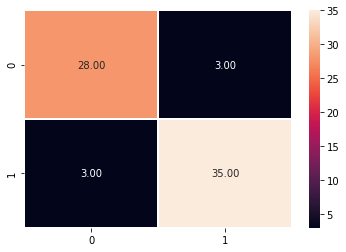

In [297]:
print("CONFUSION MATRIX ON TEST SET")
cm2=confusion_matrix(Y_test,Y_test_pred)
sns.heatmap(cm2, annot=True, annot_kws={"size": 10}, fmt=".2f", linewidths=1)